In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif

from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 47.62% 0.43
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [3]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]

In [4]:
# NuSVC, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'nu' : uniform(loc=0.0,scale=0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking' : [True,False],
    'probability' : [True,False],
    'max_iter' : [600],
    'break_ties' : [True,False]
}

nusvc = svm.NuSVC(random_state=rand_seed)
random_search_nu = RandomizedSearchCV(nusvc, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.3189
Vanilla Train Accuracy: 99.7506%
[3. 1. 1. 1. 4. 2. 4. 3. 1. 1. 1. 4. 4. 6. 1. 1. 6. 1. 6. 6. 6.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Vanilla Validation Accuracy: 47.62%
Vanilla F1-score: 0.43
Vanilla Precision Score: 0.48
Vanilla Recall Score: 0.48
Vanilla ROC-AUC Score: 0.70
Vanilla ROC-AUC Score: 0.67
Vanilla ROC-AUC Score: 0.60
Vanilla ROC-AUC Score: 0.69
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.94


(47.61904761904761, 0.4252136752136752)

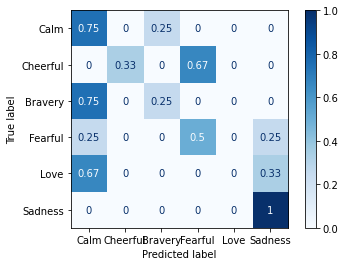

In [5]:
    print_res_6_way("Vanilla",x_train,y_train,random_search_nu, themes, verbose = False)
    test_res_6_way("Vanilla",x_val,y_val,random_search_nu, themes)

Best Score: 0.7987
Random Oversampling Train Accuracy: 99.8667%
[3. 1. 1. 1. 4. 2. 4. 3. 1. 1. 1. 4. 4. 6. 1. 1. 6. 1. 6. 6. 6.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Random Oversampling Validation Accuracy: 47.62%
Random Oversampling F1-score: 0.43
Random Oversampling Precision Score: 0.48
Random Oversampling Recall Score: 0.48
Random Oversampling ROC-AUC Score: 0.70
Random Oversampling ROC-AUC Score: 0.67
Random Oversampling ROC-AUC Score: 0.60
Random Oversampling ROC-AUC Score: 0.69
Random Oversampling ROC-AUC Score: 0.50
Random Oversampling ROC-AUC Score: 0.94


(47.61904761904761, 0.4252136752136752)

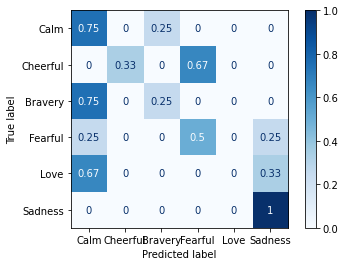

In [6]:
    print_res_6_way("Random Oversampling",x_os,y_os,random_search_nu,themes, verbose = False)
    test_res_6_way("Random Oversampling",x_val,y_val,random_search_nu,themes)

Best Score: 0.7853
break_ties => False
kernel => rbf
max_iter => 600
nu => 0.05897965949169405
probability => False
shrinking => False
Splits: 10
SMOTE Train Accuracy: 99.8667%
[3. 1. 1. 1. 4. 2. 4. 3. 1. 1. 4. 4. 4. 6. 1. 1. 6. 1. 6. 6. 6.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
SMOTE Validation Accuracy: 47.62%
SMOTE F1-score: 0.42
SMOTE Precision Score: 0.47
SMOTE Recall Score: 0.48
SMOTE ROC-AUC Score: 0.73
SMOTE ROC-AUC Score: 0.67
SMOTE ROC-AUC Score: 0.60
SMOTE ROC-AUC Score: 0.66
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.94


(47.61904761904761, 0.4219576719576719)

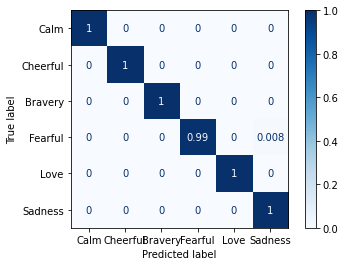

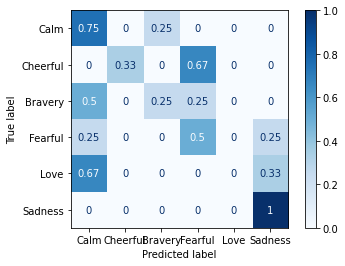

In [7]:
    print_res_6_way("SMOTE",x_smote,y_smote,random_search_nu,themes)
    test_res_6_way("SMOTE",x_val,y_val,random_search_nu,themes)

In [8]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 42.86% 0.34
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [9]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,0,100), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [600],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Best Score: 0.3565
Vanilla Train Accuracy: 66.3342%
[1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 1. 1. 4. 6. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Vanilla Validation Accuracy: 23.81%
Vanilla F1-score: 0.13
Vanilla Precision Score: 0.14
Vanilla Recall Score: 0.24
Vanilla ROC-AUC Score: 0.59
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.60
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.47


(23.809523809523807, 0.13275613275613274)

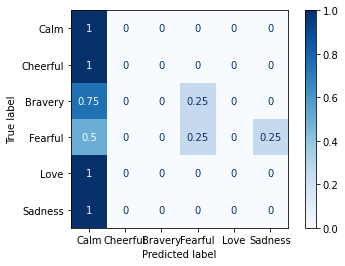

In [10]:
    print_res_6_way("Vanilla",x_train,y_train,random_search_svm, themes, verbose = False)
    test_res_6_way("Vanilla",x_val,y_val,random_search_svm, themes)

Best Score: 0.7173
Random Oversampling Train Accuracy: 90.2667%
[3. 3. 1. 5. 4. 1. 1. 3. 1. 1. 3. 4. 4. 6. 1. 3. 1. 1. 6. 1. 6.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Random Oversampling Validation Accuracy: 33.33%
Random Oversampling F1-score: 0.32
Random Oversampling Precision Score: 0.32
Random Oversampling Recall Score: 0.33
Random Oversampling ROC-AUC Score: 0.39
Random Oversampling ROC-AUC Score: 0.50
Random Oversampling ROC-AUC Score: 0.66
Random Oversampling ROC-AUC Score: 0.72
Random Oversampling ROC-AUC Score: 0.47
Random Oversampling ROC-AUC Score: 0.81


(33.33333333333333, 0.3180417466131752)

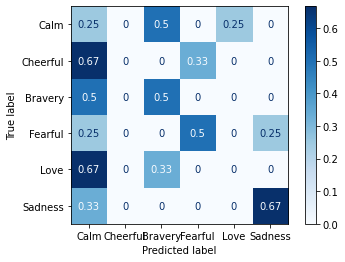

In [11]:
    print_res_6_way("Random Oversampling",x_os,y_os,random_search_svm,themes, verbose = False)
    test_res_6_way("Random Oversampling",x_val,y_val,random_search_svm,themes)

Best Score: 0.7067
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 91.6000%
[1. 3. 6. 5. 1. 1. 1. 3. 6. 1. 1. 4. 4. 6. 1. 4. 1. 1. 6. 6. 6.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
SMOTE Validation Accuracy: 33.33%
SMOTE F1-score: 0.30
SMOTE Precision Score: 0.31
SMOTE Recall Score: 0.33
SMOTE ROC-AUC Score: 0.39
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.60
SMOTE ROC-AUC Score: 0.72
SMOTE ROC-AUC Score: 0.47
SMOTE ROC-AUC Score: 0.92


(33.33333333333333, 0.29687772544915403)

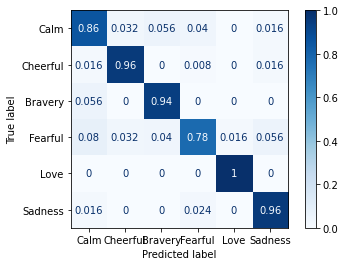

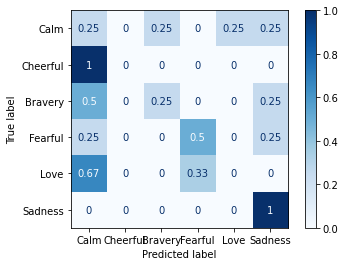

In [12]:
    print_res_6_way("SMOTE",x_smote,y_smote,random_search_svm,themes)
    test_res_6_way("SMOTE",x_val,y_val,random_search_svm,themes)

In [13]:
## extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectKBest(chi2,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [14]:
# LinearSVM, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,0,100), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[600]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.3441
Vanilla Train Accuracy: 37.1571%
[1. 4. 1. 1. 4. 1. 1. 4. 4. 1. 1. 4. 1. 1. 1. 1. 1. 1. 4. 1. 1.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.10
Vanilla Precision Score: 0.07
Vanilla Recall Score: 0.19
Vanilla ROC-AUC Score: 0.52
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.48
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50


(19.047619047619047, 0.09824561403508773)

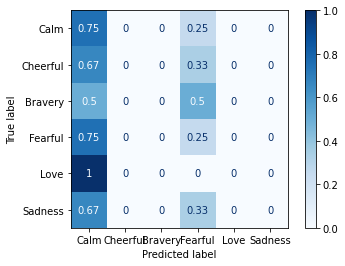

In [15]:
    print_res_6_way("Vanilla",x_train,y_train,random_search_linear, themes, verbose = False)
    test_res_6_way("Vanilla",x_val,y_val,random_search_linear, themes)

Best Score: 0.3813
Random Oversampling Train Accuracy: 42.4000%
[5. 3. 4. 5. 4. 4. 5. 4. 3. 1. 5. 4. 6. 6. 1. 1. 1. 2. 3. 1. 4.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
Random Oversampling Validation Accuracy: 9.52%
Random Oversampling F1-score: 0.09
Random Oversampling Precision Score: 0.10
Random Oversampling Recall Score: 0.10
Random Oversampling ROC-AUC Score: 0.35
Random Oversampling ROC-AUC Score: 0.47
Random Oversampling ROC-AUC Score: 0.57
Random Oversampling ROC-AUC Score: 0.48
Random Oversampling ROC-AUC Score: 0.39
Random Oversampling ROC-AUC Score: 0.44


(9.523809523809524, 0.0925170068027211)

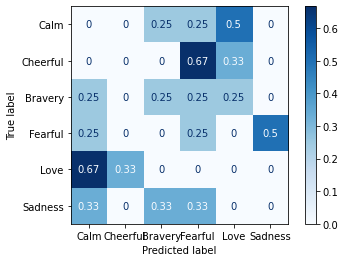

In [16]:
    print_res_6_way("Random Oversampling",x_os,y_os,random_search_linear,themes, verbose = False)
    test_res_6_way("Random Oversampling",x_val,y_val,random_search_linear,themes)

Best Score: 0.4013
penalty => l1
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => True
dual => False
C => 0.0003678379771828634
Splits: 10
SMOTE Train Accuracy: 43.4667%
[4. 2. 4. 5. 2. 4. 5. 4. 1. 3. 1. 2. 4. 4. 4. 1. 2. 2. 1. 4. 4.]
[1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 6. 6. 6.]
SMOTE Validation Accuracy: 23.81%
SMOTE F1-score: 0.20
SMOTE Precision Score: 0.28
SMOTE Recall Score: 0.24
SMOTE ROC-AUC Score: 0.38
SMOTE ROC-AUC Score: 0.56
SMOTE ROC-AUC Score: 0.62
SMOTE ROC-AUC Score: 0.70
SMOTE ROC-AUC Score: 0.44
SMOTE ROC-AUC Score: 0.50


(23.809523809523807, 0.19981684981684983)

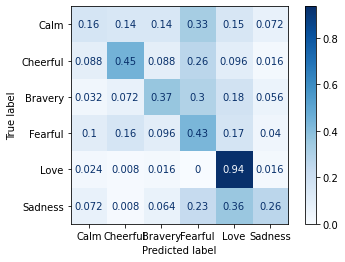

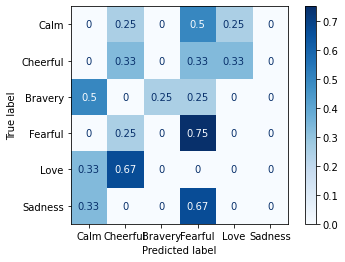

In [17]:
    print_res_6_way("SMOTE",x_smote,y_smote,random_search_linear,themes)
    test_res_6_way("SMOTE",x_val,y_val,random_search_linear,themes)